## BMI calculator

In [20]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [21]:
# Define state

class BMIState(TypedDict):
    height_m: float
    weight_kg: float
    bmi: float
    category: str

In [22]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi, 2)  # update bmi in state

    return state

def get_category(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 25:
        state['category'] = 'Normal'
    elif 25 <= bmi < 30:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obese'

    return state

In [23]:
# Define graph
graph = StateGraph(BMIState)

# step 1: add nodes to graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('get_category', get_category)

# step 2: add edges to graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'get_category')
graph.add_edge('get_category', END)

# step 3: compile the graph
workflow = graph.compile()



In [24]:
# step 4: execute the graph
initial_state = {'height_m': 1.8, 'weight_kg': 80}
final_state = workflow.invoke(initial_state)

print(final_state)

{'height_m': 1.8, 'weight_kg': 80, 'bmi': 24.69, 'category': 'Normal'}


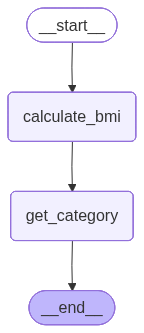

In [25]:
# To visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())